In [1]:
#importing dependencies
import pandas as Pd 
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [2]:
csv_path="Resources/fdp-beta-state-historical (1).csv"
csv_file=Pd.read_csv(csv_path,encoding='cp1252')

In [3]:
csv_file


,Variable,Year,Value,RSE,State,Industry
0,AI stud fees and herd testing ($),1990,200.0,118.0,New South Wales,All Broadacre
1,Accounting services ($),1990,2620.0,7.0,New South Wales,All Broadacre
2,Advisory services ($),1990,180.0,105.0,New South Wales,All Broadacre
3,Age of owner manager (yrs),1990,55.0,2.0,New South Wales,All Broadacre
4,Age of spouse (yrs),1990,52.0,2.0,New South Wales,All Broadacre
...,...,...,...,...,...,...
184255,Wheat receipts ($),2022,0.0,NaN,Western Australia,Sheep-Beef
184256,Wheat sold (t),2022,0.0,NaN,Western Australia,Sheep-Beef
184257,Wool cut per head (kg),2022,3.6,5.0,Western Australia,Sheep-Beef
184258,Wool produced (kg),2022,9302.0,16.0,Western Australia,Sheep-Beef


In [4]:
wheat_export=csv_file.loc[(csv_file['Variable']=='Wheat sold (t)'),:]

wheat_export_df=wheat_export[['Variable','Year','Value','State']]

wheat_export_df=wheat_export_df.rename(columns={'Value':'Kt'})
reduced_wheat_export_df=wheat_export_df.reset_index().drop(['index','Variable'],axis=1)
reduced_wheat_export_df

,Year,Kt,State
0,1990,126.0,New South Wales
1,1990,4.0,New South Wales
2,1990,690.0,New South Wales
3,1990,291.0,New South Wales
4,1990,26.0,New South Wales
...,...,...,...
1213,2022,1.0,Western Australia
1214,2022,6789.0,Western Australia
1215,2022,1238.0,Western Australia
1216,2022,99.0,Western Australia


In [5]:
#wheat_export_df.dtypes
avg_wheat_export_by_state=reduced_wheat_export_df.groupby(['State','Year']).sum()
avg_wheat_export_by_state=avg_wheat_export_by_state.reset_index()
avg_wheat_export_by_state

,State,Year,Kt
0,New South Wales,1990,1171.0
1,New South Wales,1991,1073.0
2,New South Wales,1992,738.0
3,New South Wales,1993,1227.0
4,New South Wales,1994,1239.0
...,...,...,...
226,Western Australia,2018,4801.0
227,Western Australia,2019,6679.0
228,Western Australia,2020,4260.0
229,Western Australia,2021,5804.0


In [8]:
state_data_2010=avg_wheat_export_by_state[avg_wheat_export_by_state['Year']==2017]
state_data_2020=avg_wheat_export_by_state[avg_wheat_export_by_state['Year']==2019]


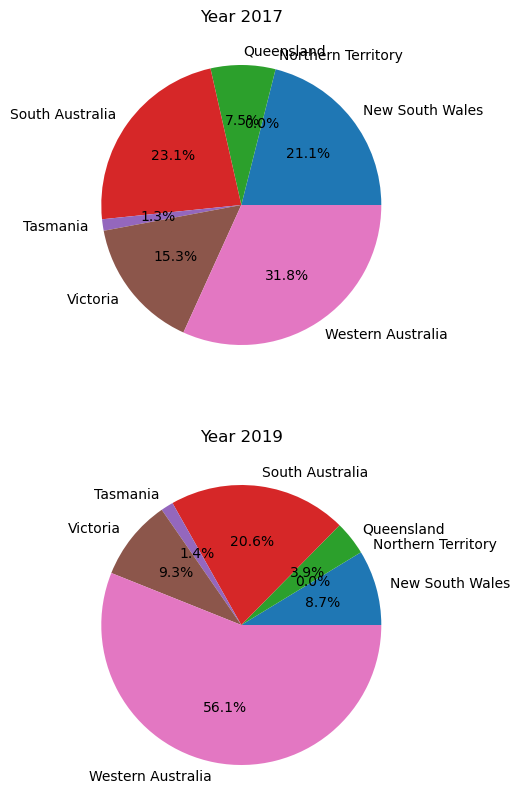

<Figure size 5000x5000 with 0 Axes>

In [10]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,10))
ax1.pie(state_data_2010['Kt'],labels=state_data_2010['State'], autopct="%1.1f%%")
ax2.pie(state_data_2020['Kt'],labels=state_data_2020['State'], autopct="%1.1f%%")
plt.figure(figsize = (50, 50))
ax1.set_title("Year 2017")
ax2.set_title("Year 2019")
plt.show()

In [13]:
export_vic=avg_wheat_export_by_state.loc[avg_wheat_export_by_state['State']=='Victoria',:]
export_vic

,State,Year,Kt
165,Victoria,1990,823.0
166,Victoria,1991,616.0
167,Victoria,1992,502.0
168,Victoria,1993,998.0
169,Victoria,1994,785.0
170,Victoria,1995,311.0
171,Victoria,1996,925.0
172,Victoria,1997,816.0
173,Victoria,1998,539.0
174,Victoria,1999,653.0


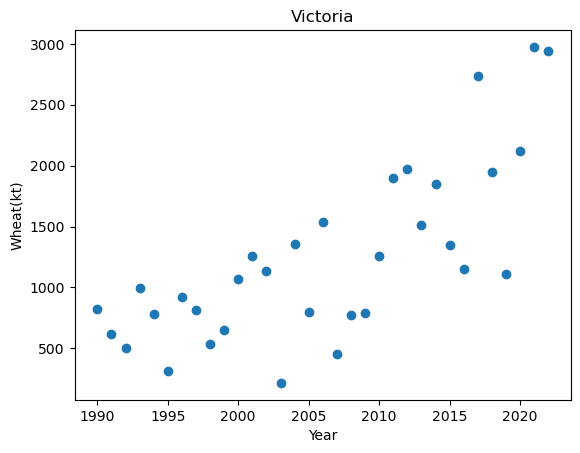

In [11]:
#export_vic=avg_wheat_export_by_state[avg_wheat_export_by_state['State']=='Victoria']['Kt']

plt.scatter(avg_wheat_export_by_state['Year'].unique(),export_vic['Kt'])
plt.title('Victoria')
plt.xlabel('Year')
plt.ylabel('Wheat(kt)')
plt.show()

In [21]:
export_vic[(export_vic['Year']>2009)&(export_vic['Year']<2021)].reset_index(drop=True)

,State,Year,Kt
0,Victoria,2010,1255.0
1,Victoria,2011,1901.0
2,Victoria,2012,1969.0
3,Victoria,2013,1511.0
4,Victoria,2014,1848.0
5,Victoria,2015,1350.0
6,Victoria,2016,1155.0
7,Victoria,2017,2737.0
8,Victoria,2018,1952.0
9,Victoria,2019,1111.0
